<h1> How COVID Affects Businesses </h1>

<h3> By: Vinny Barile, Ryan Patrick Mulligan, Nikit Parakh </h3>

Covid has caused a lot of harm to the economies, leading to a lot of closures of small businesses across the world and numerous bankruptcies. Through this project, we aim to create a classifier model that by knowing certain attributes of a business, can tell if it is likely to shut down or not. 

<h3> Questions </h3>

 - Can we predict which businesses stay open?
 - How does COVID affect how businesses stay open?
 - What are the potential attributes that can decide if a business will stay open?

<h3> Getting Started </h3>

We start off by importing necessary python modules like numpy, pandas, sklearn, etc. Make sure to have <strong>ALL</strong> the modules installed before trying to run the jupyter notebook.

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from ipywidgets import interact
import pickle
import time
from sklearn.decomposition import PCA
from mpl_toolkits.basemap import Basemap
import folium
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import warnings
from sklearn.metrics import plot_roc_curve
warnings.filterwarnings('ignore')

<h3>Reading in the Dataset</h3>

We then proceed to load in our business dataset from yelp using pandas.

In [3]:
#load dataset using read_json
datagraph = pd.read_json('yelp_academic_dataset_business.json',lines = True)
datagraph.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


<h3>Visualising the Dataset</h3>

We can now start visualising our dataset using matplotlib

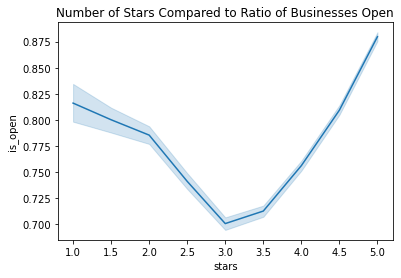

In [4]:
#created graph comparing stars and is_open
#removed states with no data
dfgraph = datagraph[datagraph.state.isin(["BC","CO","FL","GA","MA","OR","OH","TX","WA"])]
sns.lineplot(x="stars", y="is_open",data=dfgraph)
plt.title('Number of Stars Compared to Ratio of Businesses Open')
plt.show()

The above graph shows the relation between the number of stars a business gets vs the ratio of businesses that get that star rating that stay open. From the plot we can see that businesses with 3.0 stars are least likely to stay open. 

Text(0.5, 1.0, 'Ratio of Open Businesses in Each State')

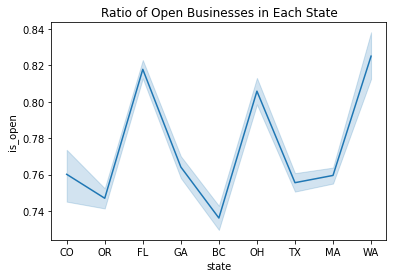

In [5]:
#created graph comparing state and is_open
sns.lineplot(x="state", y="is_open",data=dfgraph)
plt.title('Ratio of Open Businesses in Each State')

Text(0.5, 1.0, 'Cases as of 04/01/21')

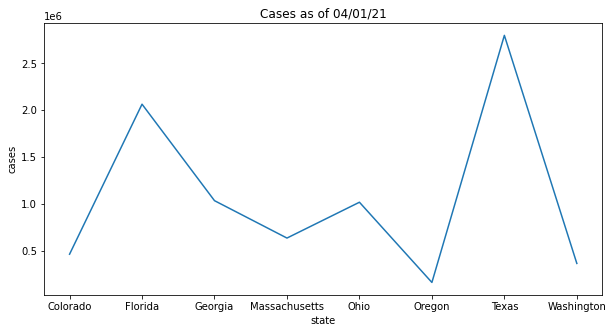

In [6]:
#GRAPH showing the number of covid cases per day
#READ in file
Rates_tot = pd.read_csv('us-states.csv')
#FILTER by dates & states avalible in other file
Rates_april= Rates_tot[Rates_tot['date'] == '2021-04-01']
#Rates_graph = Rates_april[Rates_april['state'] == "Colorado","Florida","Georgia","Maryland","Oregon","Ohio","Texas","Washington"]
Rates_graph = Rates_april[Rates_april.state.isin(["Colorado","Oregon","Florida","Georgia","Ohio",'Massachusetts',"Texas","Washington"])]
Rates_graph
#RESIZE plot
plt.figure(figsize = (10,5))
#PLOT
sns.lineplot(x="state",y = 'cases',data=Rates_graph)
sns.lineplot()
plt.title('Cases as of 04/01/21')

Inference:

- These two graphs show the cases as well as the proportion of businesses that were open as of April 1st, 2021.
- Florida, Ohio, and Washington have the highest averages of businesses still open.
- Florida and Texas have the highest number of cases.
- The states that allowed businesses to stay open also had the most cases.


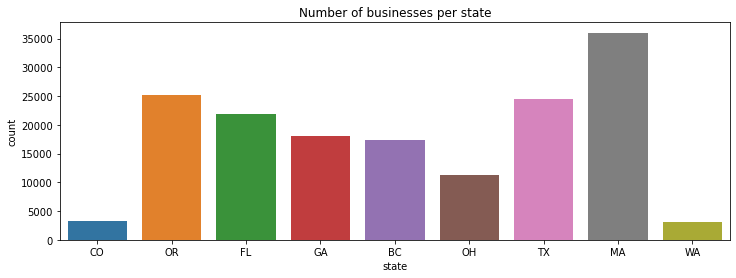

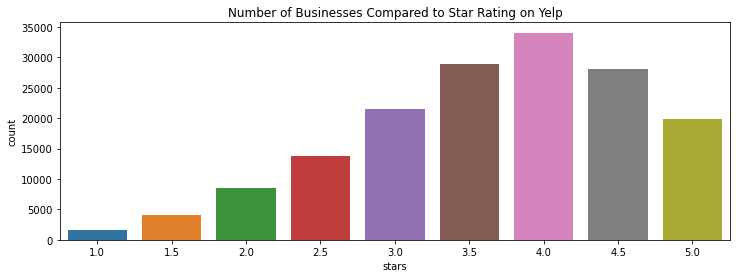

In [7]:
#graph to show total businesses per state
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['state'])
plt.title('Number of businesses per state');

#graph to show total stars given
plt.figure(figsize=(12,4))
ax = sns.countplot(dfgraph['stars'])
plt.title('Number of Businesses Compared to Star Rating on Yelp');
plt.show()

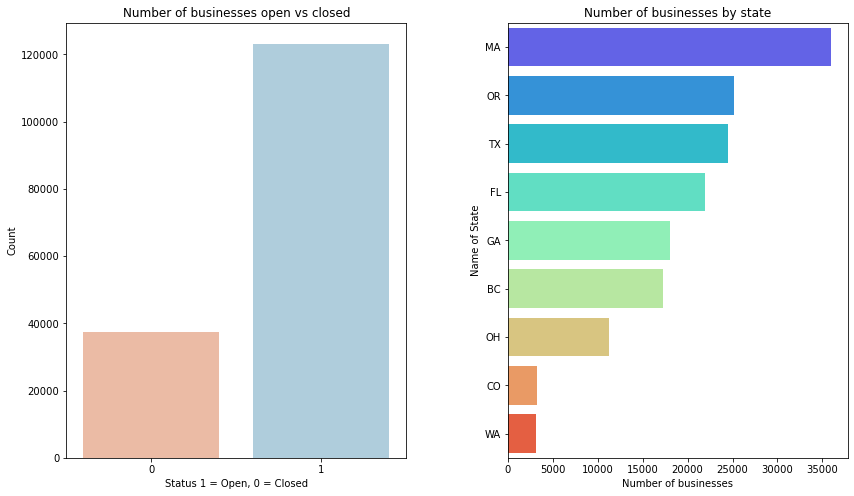

In [8]:
# graph comparing number of open vs closes businesses
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = dfgraph['is_open'].value_counts()[:20].to_frame()

sns.barplot(cnt.index, cnt['is_open'], palette = 'RdBu', ax =ax1)
ax1.set_xlabel('Status 1 = Open, 0 = Closed')
ax1.set_ylabel('Count')
ax1.set_title('Number of businesses open vs closed')

cnt = dfgraph['state'].value_counts()[:20].to_frame()

# graph comparing number of businesses by state
sns.barplot(cnt['state'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('Number of businesses')
ax2.set_ylabel('Name of State')
ax2.set_title('Number of businesses by state')
plt.subplots_adjust(wspace=0.3)
plt.show()

In [9]:
# made a folium map of the US showind the total number of is_open per state
import folium
state_geo = 'us-states.json'

map = folium.Map(location=[48, -102], zoom_start=3)
folium.Choropleth(geo_data=state_geo, data=dfgraph,
             columns=['state','is_open'],
             key_on='feature.id',
             fill_color='BuGn', fill_opacity=.7, line_opacity=0.1,
             legend_name='is_open', smooth_factor=0.1,highlight=True).add_to(map)
folium.LayerControl().add_to(map)

map

In [ ]:
#used basemap to show a similar map of where our data is located
fig = plt.figure(figsize=(14, 8), edgecolor='w')
m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat= 90,resolution='c',
          lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='Green',lake_color='Blue')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(datagraph['latitude'].tolist(),datagraph['longitude'].tolist())
m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

<h3> Creating the Model </h3>

The model we created for this project is a classifier that tries to predict if a business will stay open during covid or not. It uses various attributes about the business - like location, reviews, ratings, etc. - as independent variables to determine the dependent variable “is_open”. It is a Support Vector Machine (SVM) model that incorporates Principal Component Analysis to find the best features.

The computational techniques we used to create the model are:

- Used pandas to load in JSON foot traffic data
- Selected important attributes and feature hashed categorical attributes like state.
- Created an SVM model using SKLEARN.
- Performed Principal Component Analysis on the model to streamline it and make it more efficient
- Used the model to predict “is_open” on our test dataset and printed the summary and the confusion matrix of the prediction


In [10]:
#read data again
data = pd.read_json('yelp_academic_dataset_business.json', lines=True, orient='columns', encoding='utf-8')

In [11]:
#drop None value rows
df1 = data.mask(data.astype(object).eq('None')).dropna()

#normalise attributes to get data from nested columns
df2 = pd.json_normalize(df1['attributes'])

#drop useless columns
df1 = df1.drop(["attributes", "hours"], axis = 1)

#combine dataframes 
df_concat = pd.concat([df1, df2], axis=1)

In [12]:
# keep only restaurant-like businesses
df_concat['categories'] = df_concat['categories'].str.lower()
df = df_concat.loc[df_concat.categories.str.contains("restaurant|food|deli|pizza|cafe", na=False)]

In [13]:
#replace empty values with NaN
df = df.replace(['',' ','NULL'],np.nan)

#Get rid of columns for which majority of values are NaN
temp = df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1)
temp = temp.dropna(how='any')

In [14]:
#Drop categorical columns
temp = temp.drop(["business_id", "name", "address", "categories", "BusinessParking", "city"], axis = 1)
temp = temp[temp.postal_code.apply(lambda x: x.isnumeric())]

In [15]:
#Feature hash the states column to get some continuity out of a categorical column
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(temp['state'])
dfx = pd.DataFrame(hashed_features.toarray())
dfx.columns = ['state_0', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5']
hashed = pd.concat([temp.reset_index(drop=True), dfx.reset_index(drop=True)], axis=1)
hashed

,state,postal_code,latitude,longitude,stars,review_count,is_open,BikeParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,state_0,state_1,state_2,state_3,state_4,state_5
0,CO,80302,40.017544,-105.283348,4.0,86.0,1.0,True,True,2,0.0,0.0,0.0,-1.0,1.0,0.0
1,OR,97218,45.588906,-122.593331,4.0,126.0,1.0,False,True,2,0.0,0.0,0.0,1.0,1.0,0.0
2,CO,80302,39.998449,-105.281006,3.5,5.0,1.0,True,True,2,0.0,0.0,0.0,-1.0,1.0,0.0
3,MA,01960,42.541155,-70.973438,4.0,39.0,1.0,True,True,2,0.0,0.0,0.0,0.0,2.0,0.0
4,MA,02128,42.363442,-71.025781,3.5,856.0,1.0,True,True,2,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14816,OR,97005,45.492267,-122.787117,3.5,197.0,0.0,True,True,1,0.0,0.0,0.0,1.0,1.0,0.0
14817,OR,97213,45.536427,-122.618696,3.5,59.0,1.0,True,True,2,0.0,0.0,0.0,1.0,1.0,0.0
14818,MA,02145,42.395540,-71.079465,3.0,14.0,1.0,False,True,4,0.0,0.0,0.0,0.0,2.0,0.0
14819,MA,02120,42.332385,-71.099752,4.5,105.0,0.0,True,True,2,0.0,0.0,0.0,0.0,2.0,0.0


In [16]:
# Convert bool values to int and drop the now useless states column
hashed = hashed.drop("state", axis=1)
d = {"True" : 1, "False" : 0}
hashed["BikeParking"] = hashed["BikeParking"].replace(d)
hashed["BusinessAcceptsCreditCards"] = hashed["BusinessAcceptsCreditCards"].replace(d)
hashed = hashed.replace({'None' : 0})
hashed

,postal_code,latitude,longitude,stars,review_count,is_open,BikeParking,BusinessAcceptsCreditCards,RestaurantsPriceRange2,state_0,state_1,state_2,state_3,state_4,state_5
0,80302,40.017544,-105.283348,4.0,86.0,1.0,1,1,2,0.0,0.0,0.0,-1.0,1.0,0.0
1,97218,45.588906,-122.593331,4.0,126.0,1.0,0,1,2,0.0,0.0,0.0,1.0,1.0,0.0
2,80302,39.998449,-105.281006,3.5,5.0,1.0,1,1,2,0.0,0.0,0.0,-1.0,1.0,0.0
3,01960,42.541155,-70.973438,4.0,39.0,1.0,1,1,2,0.0,0.0,0.0,0.0,2.0,0.0
4,02128,42.363442,-71.025781,3.5,856.0,1.0,1,1,2,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14816,97005,45.492267,-122.787117,3.5,197.0,0.0,1,1,1,0.0,0.0,0.0,1.0,1.0,0.0
14817,97213,45.536427,-122.618696,3.5,59.0,1.0,1,1,2,0.0,0.0,0.0,1.0,1.0,0.0
14818,02145,42.395540,-71.079465,3.0,14.0,1.0,0,1,4,0.0,0.0,0.0,0.0,2.0,0.0
14819,02120,42.332385,-71.099752,4.5,105.0,0.0,1,1,2,0.0,0.0,0.0,0.0,2.0,0.0


In [17]:
#separate training and testing data and their respective labels
feature_vectors = hashed.drop("is_open", axis=1)
class_labels = hashed["is_open"]
train_vectors, test_vectors, train_labels, test_labels = train_test_split(feature_vectors, class_labels,random_state=202, test_size=0.25)

In [18]:
# Perform PCA to get most important attribute
n_components = 1 # This is much less than the original n_features

print("Extracting the top %d features from %d features" % (n_components, train_vectors.shape[0]))

#Set up the pca object with the number of compoents we want to find
pca = PCA(n_components=n_components, whiten=True)

#Fit the training data to the pca model.
_ = pca.fit(train_vectors)

total_variance = np.sum(pca.explained_variance_ratio_)*100
print("These %d eigenvectors account for a total of %d percent of the total variance in the original dataset"
      % (n_components, total_variance))

#transform dataset
pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)

print("Training set changed from a size of: ", train_vectors.shape, ' to: ', pca_train_vectors.shape)
print("Testing set changed from a size of: ", test_vectors.shape, ' to: ', pca_test_vectors.shape)

Extracting the top 1 features from 11115 features
These 1 eigenvectors account for a total of 99 percent of the total variance in the original dataset
Training set changed from a size of:  (11115, 14)  to:  (11115, 1)
Testing set changed from a size of:  (3706, 14)  to:  (3706, 1)


In [19]:
pca_train_vectors

array([[ 0.94925844],
       [ 0.94888355],
       [-0.07643797],
       ...,
       [ 1.47582896],
       [-0.37586746],
       [-0.37823383]])

In [20]:
#create the model using GridSearchCV to get an SVM model

#file to save in
filename = 'predict_open_pca.p'

#flag to rerun grid search
rerun = False
if rerun:
    start = time.time()

    #make some temporary variables so you can change this easily
    tmp_vectors = pca_train_vectors
    tmp_labels = train_labels

    print("Fitting the classifier to the training set")
    param_grid = {'C': [1e3, 5e3, 1e4],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01],
                   'kernel' : ['linear']}
    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, n_jobs=-1)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    end = time.time()
    print("Runtime",end - start)
    # save in a file
    pickle.dump(clf, open(filename, 'wb'))
else:
    # load model from file
    clf = pickle.load(open(filename, 'rb'))

<h3> Results </h3>

Predicting if the business is open on test set
              precision    recall  f1-score   support

         0.0       0.36      0.39      0.37      1171
         1.0       0.70      0.68      0.69      2535

    accuracy                           0.58      3706
   macro avg       0.53      0.53      0.53      3706
weighted avg       0.59      0.58      0.59      3706

[[ 451  720]
 [ 818 1717]]


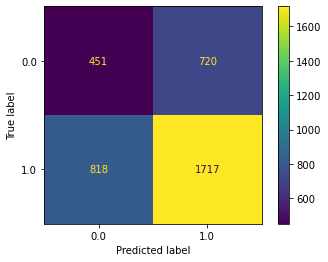

In [21]:
# test the model
predict_vectors = pca_test_vectors
true_labels = test_labels

print("Predicting if the business is open on test set")
pred_labels = clf.predict(predict_vectors)

#display results
print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(2)))
plot_confusion_matrix(clf, predict_vectors, test_labels) 
plt.show()

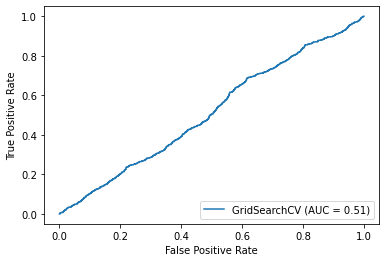

In [22]:
svc_disp = plot_roc_curve(clf, pca_test_vectors, test_labels)

Average precision-recall score: 0.69


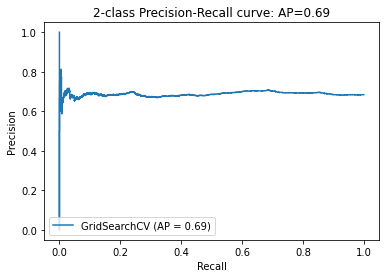

In [23]:
pred_score = clf.decision_function(pca_test_vectors)

average_precision = average_precision_score(test_labels, pred_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

disp = plot_precision_recall_curve(clf, pca_test_vectors, test_labels)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

Our final result, as expected, was a model with low accuracy due to the categorical nature of the dataset. When performing PCA on the model, we found that only one attribute was enough to attribute for 99% of the variability in our dataset, which again indicated that getting reasonable outcomes from it was something we should not expect.

Our True Positive and False Positive Rates have a near linear relation, meaning that the model is not very reliable in predicting whether a business is open or not.

The predictions of the model are a hit or a miss, which shows that SVM models do not work well with Categorical data. 

<h3> Just for Fun </h3>

Predicting if the business is open on test set
              precision    recall  f1-score   support

         0.0       0.44      0.16      0.23      1171
         1.0       0.70      0.91      0.79      2535

    accuracy                           0.67      3706
   macro avg       0.57      0.53      0.51      3706
weighted avg       0.62      0.67      0.61      3706

[[ 185  986]
 [ 236 2299]]


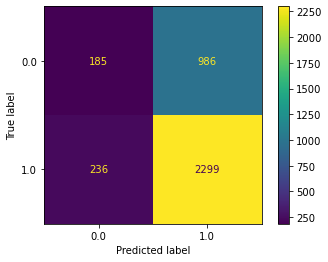

In [24]:
#create a random forest classifier
rfc = RandomForestClassifier(random_state=202)

predict_vectors = pca_test_vectors
true_labels = test_labels

# fit it to training dataset
rfc.fit(pca_train_vectors, train_labels)

print("Predicting if the business is open on test set")

#predict business is_open using new model
pred_labels = rfc.predict(predict_vectors)

#display results
print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(2)))
plot_confusion_matrix(rfc, predict_vectors, test_labels) 
plt.show()

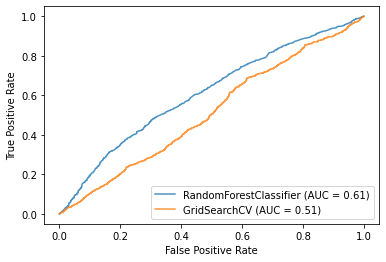

In [25]:
#compare both models
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, pca_test_vectors, test_labels, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

<h3> Difficulties and Complications </h3>

Parsing the JSON dataset was something we had never dealt with, that too nested JSON. Due to the size of the datasets, we had a hard time being able to build classifiers that worked, and could run.  The data had another problem, it was categorical, while SVMs expect continuous data. Since there isn’t a reasonable way to convert categorical data to continuous, it was unreasonable to expect high accuracy from our model. We had to use feature hashing to convert some of our attributes to continuous. When working with the SVM model, we let it run for over 4 hours, but it was never able to make a usable model. 

<h3> References </h3>
    
Datasets :

 - Business data :  https://www.yelp.com/dataset/download , 
 - COVID rates: https://github.com/nytimes/covid-19-data/blob/master/us-states.csv 

Visualisation : https://scikit-learn.org/stable/visualizations.html